# Sleeping arrangement of couples

In [28]:
#importing required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint
from pandas_profiling import ProfileReport
warnings.filterwarnings("ignore")

In [29]:
#reading the dataset into Pandas Dataframe
data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/sleeping-alone-data/sleeping-alone-data.csv",encoding="latin-1")

In [30]:
#Let us look a closer look at data by displaying top 5 rows of Dataframe and analysing shape of data
print(data.shape)
data.head()

(1094, 31)


,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:ë_""our sex life has improved as a result of sleeping in separate beds.""ë_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,...,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


- This dataset is being taken from Repo of **FiveThirtyEight** and after analysing it, We can conclude-- <br/>
    #### 1) This dataset contains 1094 rows and 31 columns
    #### 2) This dataset is about the sleeping pattern of couples
    #### 3) This dataset contains information about Questions asked to those who are or who was in relationship earlier related to their sleeping pattern with their partners.Most of the columns indicates the asked questions and rows indicate the response by each person. <br/>
  Want to follow along with me ? Grab the data from here https://raw.githubusercontent.com/fivethirtyeight/data/master/sleeping-alone-data/sleeping-alone-data.csv

In [31]:
#let us look at the columns closely to gain more information about the data
#Closer look at columns will tell us what are the questions that was being asked to Couples 
data.columns

Index(['StartDate', 'EndDate',
       'Which of the following best describes your current relationship status?',
       'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       'When both you and your partner are at home, how often do you sleep in separate beds?',
       'When you're not sleeping in the same bed as your partner, where do you typically sleep?',
       'Unnamed: 6',
       'When you're not sleeping in the same bed, where does your partner typically sleep?',
       'Unnamed: 8',
       'What are the reasons that you sleep in separate beds? Please select all that apply.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19',
       'When was the first time you slept in separate beds?',
       'To what extent do you agree with the following statement: "sleepin

# Follow up Questions -

### Q1 - How much percentage of couples sleep in separate beds ? 
  Guess: can be answered by this attribute - When both you and your partner are at home, how often do you sleep in separate beds?
### Q2 - Does sleeping in separate beds depends upon age of partners ?
  Guess : Can be answered by AGE attribute  and    When both you and your partner are at home, how often do you sleep in separate beds? By checking correlation or from pivot table
### Q3 - What's the reason for sleeping in separate beds ? <br/>
  Guess : Can be answered by these attributes - <br/>
  'What are the reasons that you sleep in separate beds? Please select all that apply.',
  'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13','Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19'
### Q4 - Does sleeping in separate beds depend upon the time period of the relationship ?
  Guess : Can be answerd by - <br/>
   When both you and your partner are at home, how often do you sleep in separate beds? and How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.

- ** So, let us try to analyse the data even further to get the answers of our questions **

In [32]:
# Let us have a look at descriptive Statistics of each column
data.describe(include="all")

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:ë_""our sex life has improved as a result of sleeping in separate beds.""ë_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
count,1093,1093,1094,1080,1080,483,28,483,22,221,...,482,482,482,1065,290,1006,1006,811,1002,1002
unique,262,259,7,7,7,7,27,7,22,1,...,6,6,6,24,150,3,5,6,6,10
top,7/9/14 18:35,7/9/14 19:43,Married,More than 20 years,Never,Separate bedroom,kids room,"My partner sleeps in our shared bed, I'm the o...",always sleep in same bed,One of us snores,...,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Other (please specify),retired,Male,45-60,"$50,000 - $99,999",Bachelor degree,East North Central
freq,15,13,884,468,586,185,2,180,1,221,...,214,116,207,289,72,517,312,314,320,197


As columns StartDate and EndDate and Row number 0  are not useful at all for our questions, so it's better to remove them

In [33]:
data.drop(0,axis=0,inplace=True)
data.drop(['StartDate','EndDate'],axis=1,inplace=True)
data.head()

,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:ë_""our sex life has improved as a result of sleeping in separate beds.""ë_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
1,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
5,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Office and Administrative Support Occupations,NaN,Male,18-29,"$100,000 - $149,999",Graduate degree,South Atlantic


In [34]:
# Let us understand the answers from couples about their relationship status
data["Which of the following best describes your current relationship status?"].value_counts()

Married                                            884
Single, but cohabiting with a significant other    138
In a domestic partnership or civil union            48
Divorced                                            12
Separated                                            8
Widowed                                              3
Name: Which of the following best describes your current relationship status?, dtype: int64

- As there are lot of columns starting with **Unnamed** , it's very important to know about what they signifies ?

In [35]:
unnamed_col = []
for i in data.columns:
    if i.startswith("Unnamed"):
        unnamed_col.append(i)
unnamed_col
print(len(unnamed_col))
unnamed_col #list of columns starting with Unnamed

13


['Unnamed: 6',
 'Unnamed: 8',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 25']

In [36]:
data[unnamed_col].head()

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 25
1,NaN,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Student
2,NaN,NaN,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- After analysing a little bit , we can conclude that these columns contains the answer by couples regarding the questions asked to them and each Unnamed column contain the answer of question asked in previous column name.

- Exploring the answer of Q1 <br/>
  ## How much percentage of couples sleep in separate beds ? 

- Dropping those observations where the value in How often do you sleep in separate beds? is not present i.e NaN because those observations will not be helpful for our Question


In [37]:
data = data[data['When both you and your partner are at home, how often do you sleep in separate beds?'].notnull()]
data.shape

(1079, 29)

In [38]:
answer_sep = data["When both you and your partner are at home, how often do you sleep in separate beds?"].value_counts()
print(answer_sep)
answer_sep = (answer_sep/1079)*100 #Calculating percentage
print(answer_sep)

Never                    586
Every night              147
Once a year or less      137
Once a month or less     101
A few times per month     62
A few times per week      46
Name: When both you and your partner are at home, how often do you sleep in separate beds?, dtype: int64
Never                    54.309546
Every night              13.623726
Once a year or less      12.696942
Once a month or less      9.360519
A few times per month     5.746061
A few times per week      4.263207
Name: When both you and your partner are at home, how often do you sleep in separate beds?, dtype: float64


In [39]:
for i,value in enumerate(answer_sep):
    print("Response -{}- is given by person in relationship {:05.2f} %".format(answer_sep.index[i],answer_sep[i]))

Response -Never- is given by person in relationship 54.31 %
Response -Every night- is given by person in relationship 13.62 %
Response -Once a year or less- is given by person in relationship 12.70 %
Response -Once a month or less- is given by person in relationship 09.36 %
Response -A few times per month- is given by person in relationship 05.75 %
Response -A few times per week- is given by person in relationship 04.26 %


## Findings related to Q1 - How much percentage of couples sleep in separate beds ? are as follows:
Response -Never- is given by person in relationship 54.31 % <br/>
Response -Every night- is given by person in relationship 13.62 % <br/>
Response -Once a year or less- is given by person in relationship 12.70 % <br/>
Response -Once a month or less- is given by person in relationship 09.36 % <br/>
Response -A few times per month- is given by person in relationship 05.75 % <br/>
Response -A few times per week- is given by person in relationship 04.26 % <br/>

- Let's try to answer  - <br/>
## Q2 - Does sleeping in separate beds depends upon age of partners ?

In [40]:
data["Age"].value_counts()

45-60    312
30-44    288
> 60     283
18-29    122
Name: Age, dtype: int64

In [41]:
g=data.groupby("When both you and your partner are at home, how often do you sleep in separate beds?")["Age"].value_counts()

## Finding of Q2- How much percentage of couples sleep in separate beds ? are as follows:

In [42]:
print(g)

When both you and your partner are at home, how often do you sleep in separate beds?  Age  
A few times per month                                                                 30-44     23
                                                                                      45-60     19
                                                                                      > 60      12
                                                                                      18-29      4
A few times per week                                                                  30-44     21
                                                                                      45-60     12
                                                                                      > 60       9
                                                                                      18-29      2
Every night                                                                           > 60      61
                 

********************************************************************************** 

********************************************************************************** 

- Exploring the answer of-
## Q3 - What's the reason for sleeping in separate beds ? <br/>

In [43]:
list_of_col = data.columns.tolist() #This list will contain all the names of  columns
list_of_col_not_for_reason = list_of_col[0:7] #This list will contain all the names of  columns which are not required for Q3
for i  in range(18,len(list_of_col)-1):
    list_of_col_not_for_reason.append(list_of_col[i])
list_of_col_for_reason = list_of_col[7:18] ##This list will contain all the names of  columns which are required for Q3

In [44]:
# Dropping those columns which  which are not required for Q3
data_reason = data.drop(list_of_col_not_for_reason,axis=1)
print(data_reason.shape)
# Dropping those rows or observations which don't have any answer of the question Q3
data_reason = data_reason.dropna(axis=0,how="all",subset=list_of_col_for_reason)
print(data_reason.shape)
data_reason.head()

(1079, 12)
(482, 12)


,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Location (Census Region)
1,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Pacific
2,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,NaN,South Atlantic
13,One of us snores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West North Central
16,NaN,NaN,NaN,NaN,We have different temperature preferences for ...,NaN,NaN,NaN,NaN,NaN,Other (please specify),Mountain
17,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,One of us needs to sleep with a child,NaN,NaN,Mountain


In [45]:
print(data_reason["Unnamed: 19"].value_counts()) #drop this column , it's not helpful
data_reason.drop("Unnamed: 19",axis=1,inplace=True)
data_reason.head()

Other (please specify)    108
Name: Unnamed: 19, dtype: int64


,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Location (Census Region)
1,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pacific
2,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,South Atlantic
13,One of us snores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West North Central
16,NaN,NaN,NaN,NaN,We have different temperature preferences for ...,NaN,NaN,NaN,NaN,NaN,Mountain
17,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,One of us needs to sleep with a child,NaN,Mountain


In [46]:
for i in unnamed_col:
    if i in data_reason.columns:
        print("****************************************************************************")
        print(i)
        pprint(data_reason[i].value_counts())
print("****************************************************************************")
print("{}".format(list_of_col[7]))
pprint(data_reason[list_of_col[7]].value_counts())

****************************************************************************
Unnamed: 10
One of us makes frequent bathroom trips in the night    58
Name: Unnamed: 10, dtype: int64
****************************************************************************
Unnamed: 11
One of us is sick    126
Name: Unnamed: 11, dtype: int64
****************************************************************************
Unnamed: 12
We are no longer physically intimate    32
Name: Unnamed: 12, dtype: int64
****************************************************************************
Unnamed: 13
We have different temperature preferences for the room    50
Name: Unnamed: 13, dtype: int64
****************************************************************************
Unnamed: 14
We've had an argument or fight    74
Name: Unnamed: 14, dtype: int64
****************************************************************************
Unnamed: 15
Not enough space    25
Name: Unnamed: 15, dtype: int64
**************************

In [47]:
reasons = {'Do not want to share the covers':14,"Not enough space":25,"No longer physically intimate":32,"Different temperature preferences for the room":50,"Needs to sleep with a child":50,"Frequent bathroom trips in the night":58,"Had an argument or fight":74,"Night working/very different sleeping times":78,"Sick":126,"Snooring":220}

In [48]:
reasons_per = {}
for i,v in reasons.items():
    reasons_per[i] = (v/482)*100
reasons_per #Contain the percentage value of Reasons

{'Different temperature preferences for the room': 10.37344398340249,
 'Do not want to share the covers': 2.904564315352697,
 'Frequent bathroom trips in the night': 12.033195020746888,
 'Had an argument or fight': 15.352697095435685,
 'Needs to sleep with a child': 10.37344398340249,
 'Night working/very different sleeping times': 16.182572614107883,
 'No longer physically intimate': 6.639004149377594,
 'Not enough space': 5.186721991701245,
 'Sick': 26.141078838174277,
 'Snooring': 45.643153526970956}

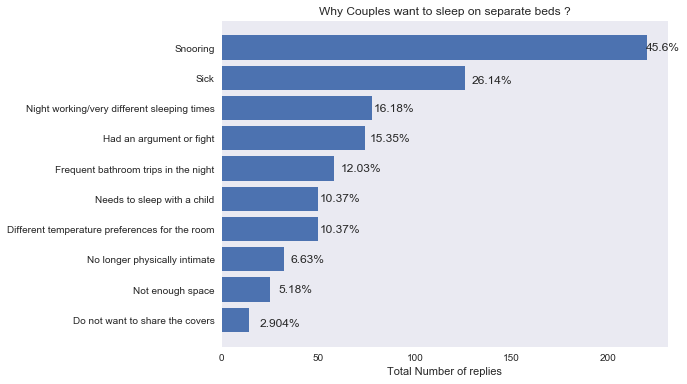

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ypos = np.arange(len(reasons.keys()))
plt.barh(ypos,list(reasons.values()))
plt.yticks(np.arange(0,10),list(reasons.keys()))
#plt.xticks(np.arange(0,100000),["0%","20%","40%","60%","80%"])
plt.grid()
plt.text(219.5,8.9,"45.6%",withdash=True)
plt.text(129.5,7.8,"26.14%",withdash=True)
plt.text(78.5,6.9,"16.18%",withdash=True)
plt.text(76.5,5.9,"15.35%",withdash=True)
plt.text(61.5,4.9,"12.03%",withdash=True)
plt.text(50.5,3.9,"10.37%",withdash=True)
plt.text(50.5,2.9,"10.37%",withdash=True)
plt.text(35.5,1.9,"6.63%",withdash=True)
plt.text(29.5,0.9,"5.18%",withdash=True)
plt.text(19.5,-0.2,"2.904%",withdash=True)
plt.xlabel("Total Number of replies")
plt.title("Why Couples want to sleep on separate beds ?")
plt.show()

## Bar plot is revealing the answer of Q3

- Coming back to last question -
 ## Q4 - Does sleeping in separate beds depend upon the time period of the relationship ?


In [50]:
print("Missing values")
#Give count of missing values
print(data['Which of the following best describes your current relationship status?'].isnull().sum()) 
data['Which of the following best describes your current relationship status?'].value_counts()

Missing values
0


Married                                            874
Single, but cohabiting with a significant other    136
In a domestic partnership or civil union            48
Divorced                                            12
Separated                                            7
Widowed                                              2
Name: Which of the following best describes your current relationship status?, dtype: int64

In [51]:
print("Missing values")
#Give count of missing values
print(data["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].isnull().sum())
data["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].value_counts()

Missing values
0


More than 20 years    468
6-10 years            165
1-5 years             162
11-15 years           159
16-20 years           104
Less than 1 year       21
Name: How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship., dtype: int64

In [52]:
print("Missing values")
#Give count of missing value
print(data["When both you and your partner are at home, how often do you sleep in separate beds?"].isnull().sum())
data["When both you and your partner are at home, how often do you sleep in separate beds?"].value_counts()

Missing values
0


Never                    586
Every night              147
Once a year or less      137
Once a month or less     101
A few times per month     62
A few times per week      46
Name: When both you and your partner are at home, how often do you sleep in separate beds?, dtype: int64

In [53]:
g1 = data.groupby('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')["When both you and your partner are at home, how often do you sleep in separate beds?"].value_counts()

## Findings related to -
## Q4 - Does sleeping in separate beds depend upon the time period of the relationship ?are as follows:

In [54]:
print(g1)

How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.  When both you and your partner are at home, how often do you sleep in separate beds?
1-5 years                                                                                                                                            Never                                                                                   100
                                                                                                                                                     Once a month or less                                                                     22
                                                                                                                                                     Every night                                                                              15
                                           

***

***

## So, this is my Analysis related to this Dataset - Sleeping Partern of Couples

******

***